In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
plt.style.use('seaborn')

# [2월 4일]
---

## # 통계적 가설검정
---

### # 귀무가설
---
- $H_0$으로 표현
- 차이가 없다 또는 효과가 없다.
- fd
$$$$

### # 대립가설
---

In [9]:
# "감자튀김 무게의 평균이 130g이다."라는 귀무가설에 대한 유의성 검정을 수행하세요. (정규분포, 분산 9)

df = pd.read_csv('D:\python\cakd5\m3_통계\data\ch11_potato.csv')
display(df)

# 검정통계량
s_mean = np.mean(df.무게)
z = (s_mean - 130) / np.sqrt(9/14)
print(z)

# 임계값
rv = stats.norm()
rv.isf(0.95)

# 검정통계량이 임계값보다 작으므로 귀무가설을 기각

,무게
0,122.02
1,131.73
2,130.60
3,131.82
4,132.05
5,126.12
6,124.43
7,132.89
8,122.79
9,129.95


-1.932298779026813


-1.6448536269514722

In [10]:
# p값이 유의수준 0.05보다 작으므로 귀무가설을 기각
# "모평균이 130g이다"라는 결론이 되는 것은 아니다.

p_value = rv.cdf(z)
p_value

0.026661319523126635

Text(0, 0.5, 'cdf')

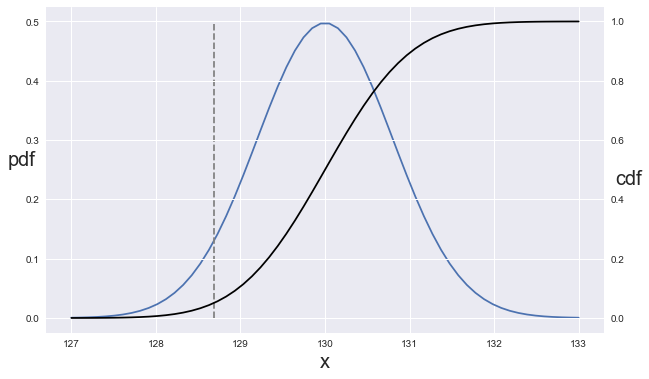

In [13]:
rv = stats.norm(130, np.sqrt(9/14))

fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127, 133, 60)
ax1.plot(xs, rv.pdf(xs))
ax2.plot(xs, rv.cdf(xs), color = 'black')
ax1.vlines(rv.ppf(0.05), 0, 0.5, color = 'gray', ls = '--')
ax1.set_xlabel('x', fontsize = 20)
ax1.set_ylabel('pdf', rotation = 0, fontsize = 20)
ax2.set_ylabel('cdf', rotation = 0, fontsize = 20)

# [2월 7일]
---

### # 단측검정과 양측검정
---

#### # 단측검정
---
- 위와 같음

#### # 양측검정
---
- 양측검정의 p값은 상단과 하단의 양쪽 면적을 고려해야하므로 누적밀도함수의 2배로 계산한다.

In [15]:
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932298779026813

In [18]:
rv = stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [21]:
# p값이 0.05보다 크므로 귀무가설은 기각되지 않는다. '감자튀김 무게는 130g이 아니다'라고 말할 수 없다.

rv.cdf(z) * 2

0.05332263904625327

### # 가설검정에서의 두가지 오류
---
- 제1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
 - 실제로 모평균이 130g인데도 '모평균은 130g보다 작다'라는 결론을 내리는 상황
- 제2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
 - 실제로 모평균이 130g보다 작은데도 '모평균은 130g보다 작다'라는 결론을 얻을 수 없는 상황
- 통계적 가설검정에서는 제 1종 오류는 제어할 수 있지만 제 2종 오류는 제어할 수 없는 비대칭성이 있다.

In [40]:
# 제 1종 오류를 범할 비율 : 위험률, 유의수준(𝛼), 분석가가 제어할 수 있는 확률

rv = stats.norm(130, 3)
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z < c:
        cnt += 1
    
cnt / n_samples

0.0485

In [42]:
# 제 2종 오류를 범할 비율 : 1-𝛽, 검정력, 분석가가 제어할 수 없는 확률

## # 기본적인 가설검정
---

### # 정규분포의 모분산에 대한 검정
---

In [47]:
# 사용자 정의 함수

def pvar_test(sample, var0, alpha = 0.05):
    u_var = np.var(sample, ddof = 1)
    n = len(sample)
    rv = stats.chi2(df = n-1)
    interval = rv.interval(1 - alpha)
    
    y = (n - 1) * u_var / var0  # 검정통계량
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
        
    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = rv.sf(y) * 2
    print(f'p값은 {p:.3f}')

In [49]:
df = pd.read_csv('D:\python\cakd5\m3_통계\data\ch11_potato.csv')
sample = np.array(df.무게)

pvar_test(sample, 9)

귀무가설을 채택
p값은 0.085


### # 정규분포의 모평균에 대한 검정 (모분산을 모르는 경우)
---

In [51]:
# 사용자 정의 함수

def pmean_test(sample, mean0, alpha = 0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof = 1)
    n = len(sample)
    rv = stats.t(df = n-1)
    interval = rv.interval(1 - alpha)
    
    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각') 
        
    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = rv.sf(t) * 2
    print(f'p값은 {p:.3f}')

In [58]:
pmean_test(sample, 126)

귀무가설을 기각
p값은 0.039


## # 2표본 문제에 관한 가설검정
---

### # 대응비교 t 검정
---

In [68]:
data = pd.read_csv('D:\python\cakd5\m3_통계\data\ch11_training_rel.csv')
data['gap'] = data['후'] - data['전']
display(data.head(), data.shape)

,전,후,gap
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25


(20, 3)

In [69]:
# p값이 유의수준 0.05보다 작으므로 귀무가설을 기각하며 '근력운동은 집중력에 유의한 차이를가져온다.'라고 할 수 있다.

t, p = stats.ttest_1samp(data.gap, 0)
p

0.04004419061842953

### # 독립비교 t 검정
---

In [72]:
data = pd.read_csv('D:\python\cakd5\m3_통계\data\ch11_training_ind.csv')
display(data.head())

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [74]:
# p 값이 0.05보다 크므로 귀무가설을 채택하며 'A학급과 B학금 사이에는 평균 점수에 유의한 차이가 있다고 말할 수 없다.'

t, p = stats.ttest_ind(data.A, data.B, equal_var = False)
p

0.08695731107259362

### # 윌콕슨의 부호순위검정
---

### # 만·위트니의 U검정
---

### # 독립성 검정 (카이제곱 검정)
---

In [78]:
df = pd.read_csv('D:\python\cakd5\m3_통계\data\ch11_ad.csv')
display(df.head(), df.shape)

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


(1000, 2)

#### # 기대도수와 관측도수의 차이를 측정해서 검정 수행
---

In [80]:
# 교차집계표

ad_cross = pd.crosstab(df.광고, df.구입)
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [85]:
# 귀무가설 : 광고에 따른 차이가 없다.
# p값이 0.05보다 크므로 귀무가설을 채택, 광고 A와 광고 B에 유의미한 차이가 인정되지 않는다고 결론.

chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction = False)
print(chi2, p ,dof)

3.75 0.052807511416113395 1
